# Notebook 09 - `pandas`



## Introduction

https://pandas.pydata.org/

`pandas` is an essential data analysis and manipulation library for the Python ecosystem. In this notebook we will learn to load, clean, process, and analyze data using `pandas`. This skillset and tool are critical in any modern scientific or technical field.

### Why `pandas`?

`pandas` excels at working with tabular data (like a spreadsheet or database table) in a way that is both intuitive and highly efficient. It has several advantages:

* It is designed specifically to handle messy data (data with missing values, mixed data types [numbers, text, dates]. It can be used to clean and resructure the data before analyzing it.

* It is often easier to use than other tools because you can refer to specific rows and columns using a defined name (a descriptive label like 'Measurement_5' or 'Temperature_Kelvin') insted of an index (a row and column number (like [5, 2])). This makes your code  more readable and less prone to errors.

* Pandas is integrated with other Python-based scientific libraries like NumPy for numerical operations and Matplotlib for plotting.

This makes pandas very useful in physics for analyzing experimental data. In industry, it's the backbone of data science, used for everything from financial modeling and market analysis to processing user data and training machine learning models.

### Comparison to other tools

Excel and Google Sheets are also very useful for analyzing tabular data but they struggle with large datasets. They are also prone to manual error and difficult to automate. Still, they are great for quick data analysis and plot-making.

NumPy is incredibly fast and efficient but lacks context (no column/row labels). It also can't handle mixed data types easily, and has limited tools for data cleaning and manipulation. Still, it is the prefered choice for oerforming complex mathematical operations on large, purely numerical arrays, because of its speed.

`pandas` is very useful for large datasets, is labeled like a spreadsheet, and has the automation power of code. It can be slower than NumPy because of the additional features flexibility it offers.

There are also some other tools that one should be aware of, both within the Python ecosystem and outside of it. Within the Python Ecosystem I will mention:

* Polars - This is a modern popular commpeitor to pandas which is more optimized for paraellel processing. It is faster than pandas and has a similar interface so it is easy for pandas users to learn.

* Dask and Vaex - Tools used to superpower pandas for very large datasets.

* PySpark - Apache Spark is a very common tool in industry for big data processing on distributed clusters.

* Awkward Array - This is a Python tool developed by particle physicists because our data is often not tabular. That is, our data varies in size (jagged or nested data). In any particle collision a different number of particles (muons, electrons, jets) are produced. Trying to force this into a pandas DataFrame is unnatural and inefficient. You'd have to create many columns (muon_1_pt, muon_2_pt, etc.) and fill most of them with NaN (Not a Number) for events with fewer particles. This is clumsy and wastes memory. An Awkward Array handles this naturally. It allows each event to have a list of muons of whatever length is needed, preserving the natural structure of the data.

Outside of Python there are other common tools such as:

* R (with the Tidyverse): The Tidyverse is a collection of R packages designed for data science, with dplyr being the equivalent of pandas for data manipulation. Many data scientists find dplyr's verb-based syntax (e.g., filter(), mutate(), summarise()) to be intuitive. The choice between R/dplyr and Python/pandas is often a matter of personal or team preference.

* SQL (Structured Query Language): Before pandas or R, SQL was the primary language for manipulating structured data. It remains fundamental.

* Julia: Julia is a newer programming language designed for high-performance scientific and numerical computing. Its DataFrames.jl package serves a similar purpose to pandas and is known for its speed, often outperforming both Python and R.

* GUI-Based Tools (Tableau, Power BI): While not coding libraries, tools like Tableau and Power BI compete with pandas in the broader data analysis and business intelligence space. They allow users to connect to data sources, perform transformations, and create interactive visualizations using a drag-and-drop interface, making them very popular in business settings where coding skills may not be widespread.

## Getting Started with `pandas`


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#  sometimes necessary for plotting with Jupyter+pandas+pyplot
%matplotlib inline

In [ ]:
print(np.__version__)
print(pd.__version__)

2.0.2
2.2.2



As you know, we've learned about multiple data structures alread (lists, numpy arrays etc.)

In the follow sections we will introduce two alternative data structures which offer powerful advantages for data analysis:

* Pandas Series (series of data)

* Pandas DataFrame (tabular data)





## pandas Series

A `pandas` `Series` a superpowered version of a one-dimensional NumPy array. It also stores one-dimensional data but adds a crucial feature: an explicit index.

A Series object consists of two components:

1. Values: A sequence of data (like a NumPy array).

2. Index: A sequence of labels that are associated with each value.

This structure allows you to refer to data by a meaningful label instead of just its integer position, making your analysis more intuitive and less error-prone.



Let's start by creating a pandas series object from a Python list using the  `pd.Series()` constructor.

In [ ]:
s = pd.Series([77134,76424,33104,13441,36505,29176,34994])

In [ ]:
s

,0
0,77134
1,76424
2,33104
3,13441
4,36505
5,29176
6,34994


The series object we introduced above contains elements of type int64 and is indexed by integers 0-6

The series object has index and values attributes which allow you to extract the indeces and values separately:

In [ ]:
s.index

RangeIndex(start=0, stop=7, step=1)

In [ ]:
s.values

array([77134, 76424, 33104, 13441, 36505, 29176, 34994])

In [ ]:
s[0:2]

,0
0,77134
1,76424


In [ ]:
s[3]

np.int64(13441)

### Series Descriptive Index

Series in pandas allow you to use a more descriptive index

For example, the numbers listed above could be the populations of Indiana towns. Therefore we can assign the index attribute of a the Series object to a list with the names of these towns as the index.

In [ ]:
s.index = ["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"]

In [ ]:
# Note: We also could have created the series object and labeled the indeces in one line:
#s = pd.Series([77134,76424,33104,13441,36505,29176,34994], index=["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"])

In [ ]:
s

,0
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


Now we can refer to specific rows by name instead of index:

In [ ]:
s["Crown Point"]

np.int64(29176)

In [ ]:
s.Merrillville # this works for indeces that don't have spaces

np.int64(34994)

We can still refer to a given row by index, though the numpy like syntax is being depricated:

In [ ]:
s[4]

/tmp/ipython-input-1232273192.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[4]


np.int64(36505)

If you want to refer to a row by index number it is better to use iloc (index location):

In [ ]:
s.iloc[4]

np.int64(36505)

We can also give a descriptive name to the Series object name attribute. If you don't do this the series name defaults to `None`

In [ ]:
s.name = "Population"

In [ ]:
s

,Population
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


We could of done all of this at once:

In [ ]:
s = pd.Series([77134,76424,33104,13441,36505,29176,34994],
              name="Population",
              index=["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"])

In [ ]:
s

,Population
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


We could of done this with numpy arrays but we would have had to stick with integer indeces:


In [ ]:
pop = np.array([77134,76424,33104,13441,36505,29176,34994])
town = np.array(["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"])

In [ ]:
print(f"The population of {town[2]} is {pop[2]}")


The population of Valparaiso is 33104


In [ ]:
print(f"The population of Valparaiso is {s.Valparaiso}")


The population of Valparaiso is 33104


As you can see pandas Series can be a more convenient container for storying one-dimensinal arrays

You can give a series objects mutliple indeces and it will return a new Series object which is a subset of the original. This can be useful for studying or plotting a subset of your data.



In [ ]:
r = s[["Chesterton","Portage"]]
r

,Population
Chesterton,13441
Portage,36505


### Series Statistical Methods

There are built in statistical methods:

In [ ]:
s.median()

34994.0

In [ ]:
s.mean()

np.float64(42968.28571428572)

In [ ]:
s.std()

24328.775916010007

In [ ]:
s.min()

13441

In [ ]:
s.max()

77134

And there is a built in method to give a summary of all of the statisics:

In [ ]:
s.describe()

,Population
count,7.000000
mean,42968.285714
std,24328.775916
min,13441.000000
25%,31140.000000
50%,34994.000000
75%,56464.500000
max,77134.000000


### Plotting a pandas Series

The pandas Series interfaces with pyplot:

<Axes: >

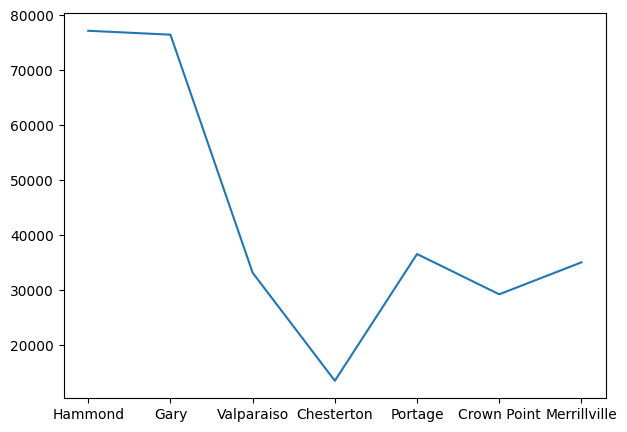

In [ ]:
plt.rcParams['figure.figsize'] = 7, 5
s.plot()

<Axes: >

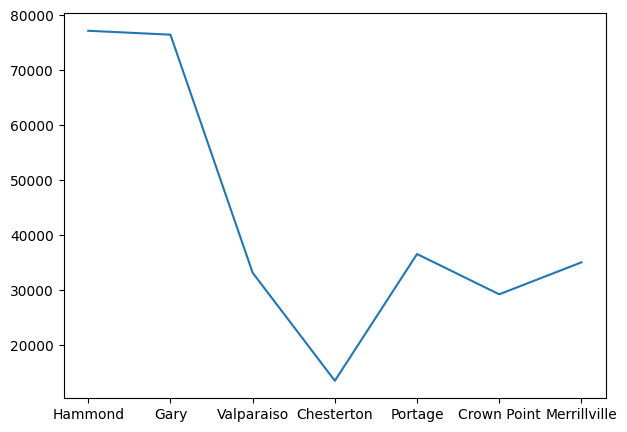

In [ ]:
s.plot(kind="line")

<Axes: >

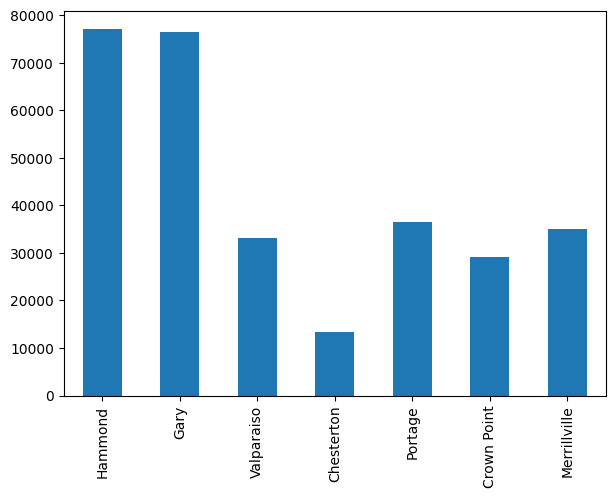

In [ ]:
s.plot(kind="bar")

<Axes: >

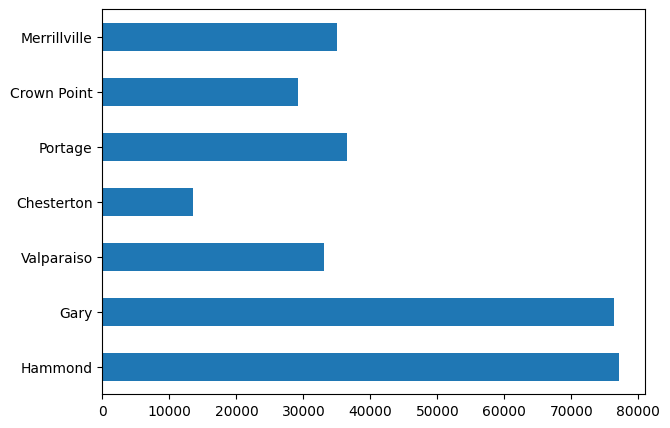

In [ ]:
s.plot(kind="barh")

<Axes: >

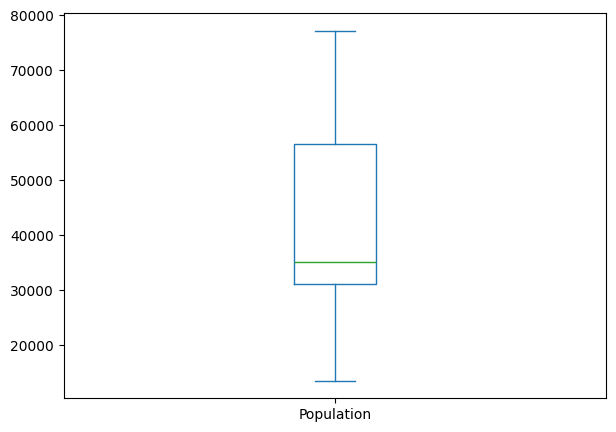

In [ ]:
s.plot(kind="box")
# green = median
# box 1st quartile - 3rd quartile
# black lines give the max and min values

<Axes: >

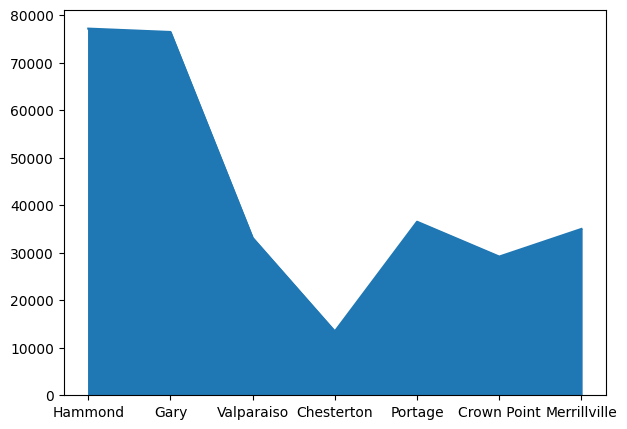

In [ ]:
s.plot(kind="area")

<Axes: ylabel='Population'>

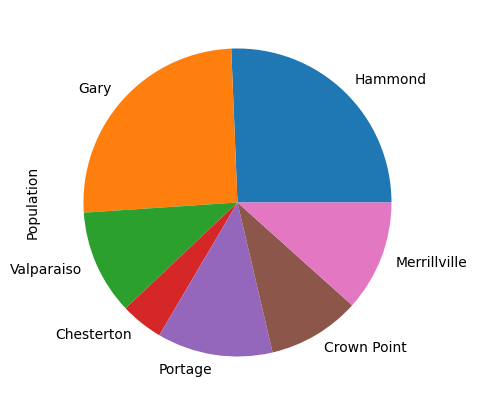

In [ ]:
s.plot(kind="pie")

This interface between pandas and pyplot is great for quick plots but we may need to specify some things by hand (like the title) or using matplotlib

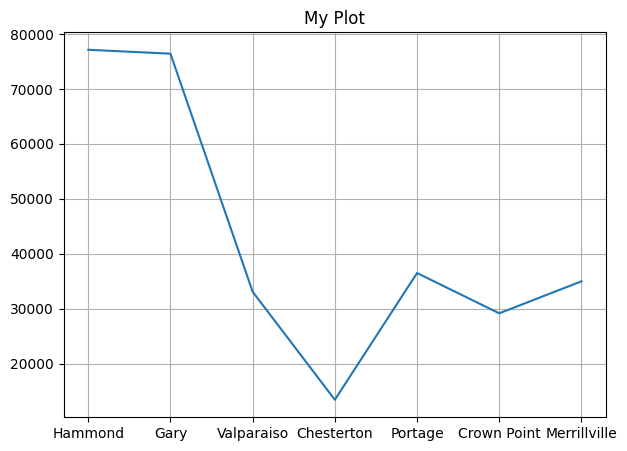

In [ ]:
# Set a global figure size
plt.rcParams['figure.figsize'] = 7, 5

# Pandas creates the figure and axes .
s.plot(kind='line', title="My Plot")

# We can still use plot to change some properties:
plt.grid(True)

To gain full control over the plot (to use matplotlib exactly like you are used to) you can tell pandas to draw the plot on axes you create explicitly using matplotlib

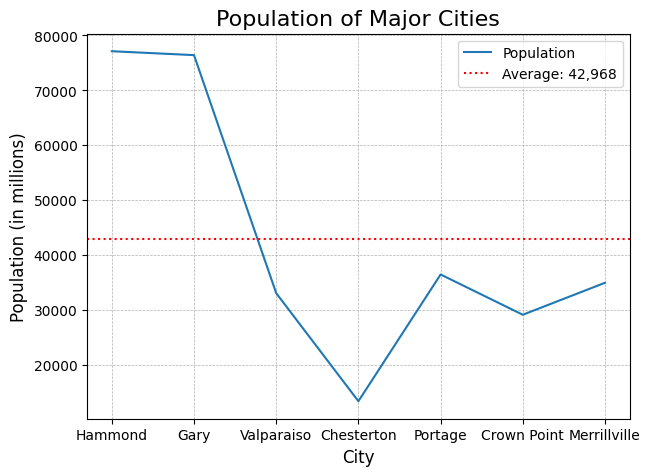

In [ ]:
# Create plotting area (fig) and a subplot to draw on (ax)
fig, ax = plt.subplots(figsize=(7, 5))

# Use pandas to draw the plot on our axis
s.plot(kind='line', ax=ax) # Pass the axes to pandas

# Now we can use ax to customize everything directly
ax.set_title("Population of Major Cities", fontsize=16)
ax.set_xlabel("City", fontsize=12)
ax.set_ylabel("Population (in millions)", fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a horizontal line for the average population
average_pop = s.mean()
ax.axhline(y=average_pop, color='r', linestyle=':', label=f'Average: {average_pop:,.0f}')

# Display the legend
ax.legend()

# Display the plot.
plt.show()

### pandas series behavior

Many of the skills we used for numpy arrays still apply for pandas Series

In [ ]:
# This is being depricated because it is ambiguous (is 2 the index or label)
s[2]

/tmp/ipython-input-2635755408.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[2]


np.int64(33104)

In [ ]:
s.iloc[2]

np.int64(33104)

In [ ]:
# Slicing syntax still works because it is not ambiguous. Still, iloc is preferred.
s[0:2]

,Population
Hammond,77134
Gary,76424


In [ ]:
# Do this instead
s.iloc[0:2]

,Npeople
Hammond,77134
Gary,76424


In [ ]:
s.iloc[2:]

,Npeople
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


In [ ]:
s

,Npeople
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


In [ ]:
s.median()

34994.0

In [ ]:
# Select a subset of your data
s[ s > s.median()]

,Npeople
Hammond,77134
Gary,76424
Portage,36505


In [ ]:
# Note: The code above is just like a boolean mask in numpy.
# It is really two steps:

# Create the mask
x = s > s.median()

# Feed the boolean mask to the series and use it to filter
s[x]

,Npeople
Hammond,77134
Gary,76424
Portage,36505


In [ ]:
x

,Npeople
Hammond,True
Gary,True
Valparaiso,False
Chesterton,False
Portage,True
Crown Point,False
Merrillville,False


In [ ]:
s.mean()

np.float64(42968.28571428572)

In [ ]:
s[ s > s.mean()]

,Npeople
Hammond,77134
Gary,76424


In [ ]:
s

,Npeople
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


In [ ]:
# If you feed iloc a list of indeces
#   it will return a new series in the order
#     you specified by the order of the indeces
s.iloc[[4,3,2]]

,Npeople
Portage,36505
Chesterton,13441
Valparaiso,33104


In [ ]:
np.cos(s)

,Npeople
Hammond,-0.046356
Gary,-0.046296
Valparaiso,-0.507764
Chesterton,0.299500
Portage,0.953355
Crown Point,-0.999579
Merrillville,-0.979954


Series also behave like dictionaries

In [ ]:
d = {'food': 'Beans', 'count': 4, 'type': 'canned'}  # use curly braces for dictionaries

In [ ]:
d['type']

'canned'

In [ ]:
s['Gary']

np.int64(76424)

In [ ]:
#s['gary'] # key error

In [ ]:
'Portage' in s

True

In [ ]:
'portage' in s

False

In [ ]:
'Chicago' in s

False

In [ ]:
s + s

,Population
Hammond,154268
Gary,152848
Valparaiso,66208
Chesterton,26882
Portage,73010
Crown Point,58352
Merrillville,69988


In [ ]:
s*500

,Population
Hammond,38567000
Gary,38212000
Valparaiso,16552000
Chesterton,6720500
Portage,18252500
Crown Point,14588000
Merrillville,17497000


In [ ]:
s

,Population
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


In [ ]:
s[2:]

,Population
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


In [ ]:
s[:-2]

,Population
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505


Adding unaligned Series will form the union of the indexes involved (if a label is not found for one of the series it will return NaN). In some cases this makes life easier than when working with numpy arrays.

In [ ]:
s[2:]+ s[:-2]

,Population
Chesterton,26882.0
Crown Point,NaN
Gary,NaN
Hammond,NaN
Merrillville,NaN
Portage,73010.0
Valparaiso,66208.0


In [ ]:
q = pd.Series([77134], name="Population",index=["Hammond"])

In [ ]:
s+q

,Population
Chesterton,NaN
Crown Point,NaN
Gary,NaN
Hammond,154268.0
Merrillville,NaN
Portage,NaN
Valparaiso,NaN


In [ ]:
s.dot(s) # dot product

np.int64(16475251066)

In [ ]:
s

,Population
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


In [ ]:
# Change the series name
s.name = "Npeople"

In [ ]:
s

,Npeople
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


In [ ]:
# copy a Series but give it a different name
s2 = s.rename("CountPeople")

In [ ]:
s

,Npeople
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


In [ ]:
s2

,CountPeople
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


## Pandas DataFrame

If a Series is like a single column in a spreadsheet, a DataFrame is the entire spreadsheet itself. It is a 2D, labeled data structure with columns of potentially different types, and it is the most common and important object in pandas.

You can think of a DataFrame in two main ways:

1 . A collection of Series objects - Imagine several Series objects that all share the same index. The DataFrame organizes them into a table where each Series becomes a column.

2. A dictionary of lists: It's also very similar to a Python dictionary where the keys are the column names and the values are the lists of data that make up those columns.

This structure is powerful because it allows you to work with your data in an intuitive, tabular way, referring to rows and columns by their labels instead of just their integer positions.


### Create a dataframe


There are many ways to create a DataFrame. Thes include building one from a nested list or building one from a Python dictionary.


In [ ]:
# Pass a nested list then label the indeces and columns:
df = pd.DataFrame([
    [77134,  "Lake",31.3],
    [76424,  "Lake",28.5],
    [33104,"Porter",34.1],
    [13441,"Porter",31.2],
    [36505,"Porter",30.3],
    [29176,  "Lake",35.3],
    [34994,  "Lake",33.8]
])


In [ ]:
df

,0,1,2
0,77134,Lake,31.3
1,76424,Lake,28.5
2,33104,Porter,34.1
3,13441,Porter,31.2
4,36505,Porter,30.3
5,29176,Lake,35.3
6,34994,Lake,33.8


In [ ]:
df.index = ["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"]

In [ ]:
df

,0,1,2
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valparaiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


In [ ]:
# Label the columns
df.columns = ["Population","County","Mean Age"]

In [ ]:
df

,Population,County,Mean Age
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valparaiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


In [ ]:
# Pass a nested list and label the indeces and columns all at once:
df = pd.DataFrame(
    [
        [77134,  "Lake",31.3],
        [76424,  "Lake",28.5],
        [33104,"Porter",34.1],
        [13441,"Porter",31.2],
        [36505,"Porter",30.3],
        [29176,  "Lake",35.3],
        [34994,  "Lake",33.8]
    ],
    index = ["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"],
    columns = ["Population","County","Mean Age"]
)


In [ ]:
df

,Population,County,Mean Age
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valparaiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


Alernative method: Setup the DataFrame witha  python dictionary
    
Recall:    
    
Dictionaries are not sequences like lists and tuples (there is no positional ordering).

Instead, objects are stored by "key" (the object is mapped to the key)

Dictionaries are mutable (they can be modified, grow, and shrink)


In [ ]:
d = {'food': 'Beans', 'count': 4, 'type': 'canned'}  # use curly braces for dictionaries

In [ ]:
d['food']

'Beans'

One can create a dataframe from a dictionary, with the dictionary keys turning into the column names

In [ ]:
df2 = pd.DataFrame(
    {
        "Population": [77134,76424,33104,13441,36505,29176,34994],
        "County": ["Lake", "Lake", "Porter", "Porter", "Porter", "Lake", "Lake"] ,
        "Mean age": [31.3, 28.5, 34.1, 31.2, 30.3, 35.3, 33.8]
    },
    index=["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"]
)

In [ ]:
df2

,Population,County,Mean age
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valparaiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


In [ ]:
df2.values # return an array

array([[77134, 'Lake', 31.3],
       [76424, 'Lake', 28.5],
       [33104, 'Porter', 34.1],
       [13441, 'Porter', 31.2],
       [36505, 'Porter', 30.3],
       [29176, 'Lake', 35.3],
       [34994, 'Lake', 33.8]], dtype=object)

In [ ]:
df2.index

Index(['Hammond', 'Gary', 'Valparaiso', 'Chesterton', 'Portage', 'Crown Point',
       'Merrillville'],
      dtype='object')

In [ ]:
df2.columns

Index(['Population', 'County', 'Mean age'], dtype='object')

In [ ]:
df2

,Population,County,Mean age
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valparaiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


### Selecting rows and columns from a dataframe

#### Selecting Rows  Rows

There are two main methods for selecting rows, based on either their label/condition or their integer position.

* **`.loc` (Label-based selection)**: Use this when you want to select rows based on their **index labels** or a **boolean condition**.
    * **Single row by label**: `df.loc['index_label']`
    * **Multiple rows by label**: `df.loc[['label_one', 'label_two']]`
    * **Slice of rows by label**: `df.loc['start_label':'end_label']` (inclusive)
    * **Rows based on a condition**: `df.loc[df['column_name'] > 5]`

* **`.iloc` (Integer-based selection)**: Use this when you want to select rows based on their **integer position** (from 0 to length-1).
    * **Single row by position**: `df.iloc[0]` (for the first row)
    * **Multiple rows by position**: `df.iloc[[0, 2, 5]]`
    * **Slice of rows by position**: `df.iloc[0:5]` (selects rows 0 through 4, exclusive of 5)



#### Selecting Columns

Selecting columns is generally more straightforward.

* **Bracket Notation `[]` (Most common)**: This is the most reliable method and works for any column name.
    * **Single column**: `df['column_name']` (This returns a `Series`)
    * **Multiple columns**: `df[['col_one', 'col_two']]` (Note the inner list; this returns a `DataFrame`)

* **Dot Notation `.`**: This is a convenient shortcut, but it only works if the column name has **no spaces**, does not conflict with a `DataFrame` method (like `df.mean`), and does not start with a number.
    * **Single column**: `df.column_name`

#### Combining Row and Column Selection

The most powerful feature is using `.loc` and `.iloc` to select specific rows *and* columns simultaneously. The format is always `[rows, columns]`.

* `df.loc['row_label', 'column_name']` (Select a single value)
* `df.iloc[0, 1]` (Select the value in the first row, second column)
* `df.loc['start_row':'end_row', ['col_one', 'col_two']]` (Select a range of rows and specific columns)

In [ ]:
#Access individual columns:
df2["Population"]

,Population
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


In [ ]:
# Another way
df2.Population

,Population
Hammond,77134
Gary,76424
Valparaiso,33104
Chesterton,13441
Portage,36505
Crown Point,29176
Merrillville,34994


In [ ]:
type(df2["Population"])

pandas.core.series.Series

In [ ]:
#Access indivdiual rows:
#  use loc for label based indexing
#  use iloc for positional indexing
#  do not use ix (depricated)

df2.loc["Portage"]

,Portage
Population,36505
County,Porter
Mean age,30.3


In [ ]:
df2.iloc[0]

,Hammond
Population,77134
County,Lake
Mean age,31.3


In [ ]:
# Pass mutliple row labels and return a new dataframe which is a subset of the original
df2.loc[["Portage", "Chesterton"]]

,Population,County,Mean age
Portage,36505,Porter,30.3
Chesterton,13441,Porter,31.2


In [ ]:
# One can also select both specific row labels and column labels

# Select two rows and one column (returns a series)
df2.loc[["Portage", "Chesterton"],"Population"]

,Population
Portage,36505
Chesterton,13441


In [ ]:
# Select two rows and two columns (returns a dataframe)
df2.loc[["Portage", "Chesterton"],["Population","Mean age"]]

,Population,Mean age
Portage,36505,30.3
Chesterton,13441,31.2


In [ ]:
# Select one rows and one columns (returns the element value)
df2.loc["Portage","Population"]

np.int64(36505)

In [ ]:
# Statistical tools still work
df2.mean(numeric_only=True)

,0
Population,42968.285714
Mean age,32.071429


In [ ]:
# You can find out summary information about the DataFrame using the method info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Hammond to Merrillville
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  7 non-null      int64  
 1   County      7 non-null      object 
 2   Mean Age    7 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 524.0+ bytes


In [ ]:
# Summary of the dataframe content and the data types with the attribute dtypes
df.dtypes

,0
Population,int64
County,object
Mean Age,float64


### Read in a big dataset with pandas

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

lots of useful options!

In [ ]:
newdf = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/Grades.csv")

In [ ]:
newdf

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76,59,14.5,25,1.0,14,12.4,1.0,44,9.8,1.0
77,59,19.0,5,1.0,9,12.5,1.0,38,9.0,1.0
78,59,20.5,22,1.0,14,18.1,1.0,42,8.9,1.0
79,59,22.9,25,NaN,14,19.3,1.0,44,9.0,NaN


In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Homework1  81 non-null     int64  
 1   Quiz1      78 non-null     float64
 2   Homework2  81 non-null     int64  
 3   Survey2    62 non-null     float64
 4   Homework3  81 non-null     int64  
 5   Quiz2      81 non-null     float64
 6   Survey3    57 non-null     float64
 7   Homework4  81 non-null     int64  
 8   Quiz3      76 non-null     float64
 9   Survey4    57 non-null     float64
dtypes: float64(6), int64(4)
memory usage: 6.5 KB


In [ ]:
# check only the first few rows
newdf.head(3)

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN


In [ ]:
# use numpy-like slicing for checking individual rows
newdf[45:58]

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
45,52,9.0,23,1.0,14,9.8,1.0,42,2.0,1.0
46,52,21.0,18,1.0,12,16.5,1.0,38,6.8,1.0
47,52,17.0,25,1.0,12,13.8,NaN,40,3.0,1.0
48,54,24.0,25,1.0,14,16.5,NaN,42,7.8,1.0
49,54,5.0,5,1.0,14,8.3,1.0,40,6.0,1.0
50,55,8.5,25,1.0,14,6.5,1.0,44,5.0,1.0
51,55,11.0,23,1.0,14,6.0,1.0,42,6.0,1.0
52,55,24.0,24,1.0,14,22.0,NaN,21,9.0,1.0
53,55,17.0,24,1.0,14,9.5,1.0,44,5.0,NaN
54,55,12.5,25,1.0,13,8.5,1.0,44,4.5,1.0


In [ ]:
# default to fist 5 rows
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN


In [ ]:
example_series = newdf["Quiz3"]
example_series

,Quiz3
0,3.0
1,10.0
2,10.0
3,9.4
4,NaN
...,...
76,9.8
77,9.0
78,8.9
79,9.0


In [ ]:
# Add a new column
newdf["updatedGrade"]= newdf.Quiz3.apply(lambda x:x+2)

In [ ]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4,updatedGrade
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN,5.0
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0,12.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN,12.0
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0,11.4
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN,NaN


In [ ]:
# Change a column based on a calculation from other columns
newdf['updatedGrade']=(newdf['Quiz3']+newdf['Quiz2'])/2

In [ ]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4,updatedGrade
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN,1.5
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0,13.5
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN,5.0
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0,12.7
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN,NaN


In [ ]:
# create a new column
newdf['Passing'] = newdf['updatedGrade'] > 5

In [ ]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4,updatedGrade,Passing
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN,1.5,False
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0,13.5,True
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN,5.0,False
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0,12.7,True
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN,NaN,False


In [ ]:
# one can remove columns with del
del newdf['Passing']

In [ ]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4,updatedGrade
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN,1.5
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0,13.5
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN,5.0
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0,12.7
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN,NaN


In [ ]:
# Remove a column from the data frame
#   and use it to create a series
new2df = newdf.pop('updatedGrade')

In [ ]:
new2df

,updatedGrade
0,1.50
1,13.50
2,5.00
3,12.70
4,NaN
...,...
76,11.10
77,10.75
78,13.50
79,14.15


In [ ]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN


In [ ]:
# new columns are inserted at the end unless you use insert
newdf.insert(0,'class','Class 3')

In [ ]:
newdf.head()

,class,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,Class 3,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,Class 3,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,Class 3,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,Class 3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,Class 3,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN


### Adding together dataframes

In [ ]:
#similar to series, if you add two dataframes together
# they will automatically align based on index (row labels) and columns
df1 = pd.DataFrame(np.random.randn(13, 4), columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
0,0.985749,-1.322362,0.798112,-0.614165
1,0.050225,-1.151707,0.078272,-0.455792
2,0.890364,0.146069,-1.876637,0.673714
3,2.315948,1.277606,0.249486,2.191484
4,-0.861488,1.350129,0.936676,1.626086
5,1.500116,0.031125,-0.221618,0.550496
6,0.792610,-0.304612,0.885785,0.825460
7,0.929743,-1.137042,0.127923,-1.777496
8,0.359996,-1.225583,-1.630519,1.123700
9,1.622121,-1.057139,-0.052431,-0.843076


In [ ]:
df2 = pd.DataFrame(np.random.randn(8, 2), columns=['A', 'B'])
df2

,A,B
0,-1.568506,1.238445
1,0.492056,-0.383480
2,0.336958,-0.153212
3,0.657506,0.674046
4,-0.039021,-2.297796
5,-0.893165,-0.483399
6,0.022098,-0.587169
7,-0.420125,2.194251


In [ ]:
df1+df2

,A,B,C,D
0,-0.582757,-0.083917,NaN,NaN
1,0.542281,-1.535187,NaN,NaN
2,1.227322,-0.007143,NaN,NaN
3,2.973454,1.951652,NaN,NaN
4,-0.900509,-0.947667,NaN,NaN
5,0.606951,-0.452273,NaN,NaN
6,0.814709,-0.891780,NaN,NaN
7,0.509618,1.057209,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [ ]:
df1

,A,B,C,D
0,0.985749,-1.322362,0.798112,-0.614165
1,0.050225,-1.151707,0.078272,-0.455792
2,0.890364,0.146069,-1.876637,0.673714
3,2.315948,1.277606,0.249486,2.191484
4,-0.861488,1.350129,0.936676,1.626086
5,1.500116,0.031125,-0.221618,0.550496
6,0.792610,-0.304612,0.885785,0.825460
7,0.929743,-1.137042,0.127923,-1.777496
8,0.359996,-1.225583,-1.630519,1.123700
9,1.622121,-1.057139,-0.052431,-0.843076


### Dataframe math

In [ ]:
df1.iloc[0]

,0
A,-1.073075
B,1.926179
C,1.095042
D,-1.155982


In [ ]:
# If you do an operation between a DataFrame and a Series
#  it is performed row by row
df1 - df1.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.552842,-0.804095,-0.051271,0.190615
2,0.403705,-2.217624,-1.549590,2.737347
3,0.883408,-2.090056,-0.631438,0.727310
4,1.426488,-2.345305,-1.422004,1.854351
5,2.179080,-1.023206,-2.710266,2.108832
6,0.788794,-0.853222,-1.104651,0.685288
7,1.242584,-2.438895,-2.675776,2.316429
8,0.589475,-4.358443,-0.075948,-0.896572
9,-0.299513,-2.902269,-1.809553,-0.991825


In [ ]:
df1

,A,B,C,D
0,-1.073075,1.926179,1.095042,-1.155982
1,-0.520234,1.122084,1.043771,-0.965367
2,-0.669370,-0.291445,-0.454549,1.581365
3,-0.189667,-0.163876,0.463604,-0.428672
4,0.353412,-0.419125,-0.326963,0.698370
5,1.106005,0.902973,-1.615224,0.952850
6,-0.284281,1.072957,-0.009609,-0.470694
7,0.169509,-0.512716,-1.580734,1.160447
8,-0.483601,-2.432264,1.019093,-2.052554
9,-1.372588,-0.976090,-0.714511,-2.147807


In [ ]:
df1=df1*100
df1

,A,B,C,D
0,-107.307515,192.617937,109.504186,-115.598167
1,-52.023352,112.208441,104.377116,-96.536652
2,-66.936987,-29.144491,-45.454853,158.136515
3,-18.966724,-16.387643,46.360382,-42.867172
4,35.341249,-41.912540,-32.696256,69.836967
5,110.600472,90.297337,-161.522404,95.285044
6,-28.428141,107.295730,-0.960903,-47.069390
7,16.950931,-51.271602,-158.073409,116.044694
8,-48.360056,-243.226378,101.909346,-205.255376
9,-137.258826,-97.608975,-71.451074,-214.780662


In [ ]:
df1**2

,A,B,C,D
0,11514.902749,37101.669512,11991.166802,13362.936245
1,2706.429166,12590.734336,10894.582241,9319.325126
2,4480.560286,849.401370,2066.143641,25007.157514
3,359.736604,268.554845,2149.285023,1837.594450
4,1249.003861,1756.661028,1069.045142,4877.202022
5,12232.464382,8153.608996,26089.487128,9079.239660
6,808.159204,11512.373578,0.923334,2215.527477
7,287.334067,2628.777126,24987.202699,13466.370906
8,2338.695018,59159.071083,10385.514886,42129.769498
9,18839.985218,9527.511937,5105.256027,46130.732572


In [ ]:
df2

,A,B
0,0.446692,-1.308168
1,1.537857,0.115935
2,0.825463,-0.849196
3,0.578695,0.159375
4,-0.999109,-0.360453
5,0.410093,1.063307
6,0.362801,-2.094966
7,-0.332713,-0.155220


In [ ]:
np.cos(df2)

,A,B
0,0.901881,0.259620
1,0.032933,0.993287
2,0.678217,0.660587
3,0.837177,0.987327
4,0.541051,0.935737
5,0.917084,0.485985
6,0.934906,-0.500494
7,0.945160,0.987978


In [ ]:
df2

,A,B
0,0.446692,-1.308168
1,1.537857,0.115935
2,0.825463,-0.849196
3,0.578695,0.159375
4,-0.999109,-0.360453
5,0.410093,1.063307
6,0.362801,-2.094966
7,-0.332713,-0.155220


In [ ]:
# Transpose indeces and columns
df2.T

,0,1,2,3,4,5,6,7
A,0.446692,1.537857,0.825463,0.578695,-0.999109,0.410093,0.362801,-0.332713
B,-1.308168,0.115935,-0.849196,0.159375,-0.360453,1.063307,-2.094966,-0.155220


In [ ]:
df2.T.dot(df2)

,A,B
A,4.989535,-0.927033
B,-0.927033,8.144799


In [ ]:
# boolean comparisons also work
df3 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] }, dtype=bool)
df3

,a,b
0,True,False
1,False,True
2,True,True


In [ ]:
df4 = pd.DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] }, dtype=bool)
df4

,a,b
0,False,True
1,True,True
2,True,False


In [ ]:
df3 & df4

,a,b
0,False,False
1,False,True
2,True,False


In [ ]:
df3 | df4

,a,b
0,True,True
1,True,True
2,True,True


### Example dataframe analysis:

Read in city population data csv file:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#  sometimes necessary for plotting with Jupyter+pandas+pyplot
%matplotlib inline

In [ ]:
df_pop = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/european_cities4.csv")

In [ ]:
df_pop.tail(10)

,Rank,City,State,Population,Date of census/estimate
95,96,Thessaloniki,Greece,"322,240",24-May-11
96,97,Wirral,United Kingdom,"320,229",30-Jun-12
97,98,Timișoara,Romania,"319,279",20-Oct-11
98,99,Catania,Italy,"315,576",31-Dec-13
99,100,Valladolid,Spain,"311,501",1-Jan-12
100,101,Bonn,Germany,"309,869",31-Dec-12
101,102,Malmö,Sweden,"309,105",31-Mar-13
102,103,Nottingham,United Kingdom,"308,735",30-Jun-12
103,104,Katowice,Poland,"308,269",30-Jun-12
104,105,Kaunas,Lithuania,"306,888",1-Jan-13


In [ ]:
# Some notes on read_csv options
#   delimiter=","  ( note: Default delimter is "," )
#   header=0  ( find column titles on row 0)
#   skiprows (number of rows to skip before reading in column data)
#   encoding (character type)
#   error_bad_lines=False  (skip lines that are causing errors)
#   only the file name is mandatory
df_pop = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/european_cities4.csv", delimiter=",", encoding="utf-8", header=0)

In [ ]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14
1,2,Berlin,Germany,"3,437,916",31-May-14
2,3,Madrid,Spain,"3,165,235",1-Jan-14
3,4,Rome,Italy,"2,872,086",30-Sep-14
4,5,Paris,France,"2,273,305",1-Jan-13


In [ ]:
df_pop.tail()

,Rank,City,State,Population,Date of census/estimate
100,101,Bonn,Germany,"309,869",31-Dec-12
101,102,Malmö,Sweden,"309,105",31-Mar-13
102,103,Nottingham,United Kingdom,"308,735",30-Jun-12
103,104,Katowice,Poland,"308,269",30-Jun-12
104,105,Kaunas,Lithuania,"306,888",1-Jan-13


In [ ]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [ ]:
df_pop["Population"].head(20)

,Population
0,"8,615,246"
1,"3,437,916"
2,"3,165,235"
3,"2,872,086"
4,"2,273,305"
5,"1,883,425"
6,"1,794,770"
7,"1,746,342"
8,"1,744,665"
9,"1,729,119"


#### Cleaning data

note: popluation data are not ints (they are strings and the strings contain commas -> "306,888")

We will use some built-in tools to remove the "," and cast the result as an integer

In [ ]:
mystr = 'Hello, World'
mystr

'Hello, World'

In [ ]:
mystr.replace(',', ':')

'Hello: World'

In [ ]:
mystr.replace(',', '')

'Hello World'

#### Apply a function to every row of data in a column of the dataframe

pandas.DataFrame.apply

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html

apply a function to a column or row

DataFrame.apply(func, axis=0) # (0 = column, 1 = row)

In [ ]:
df_pop.Population.head(10)

,Population
0,"8,615,246"
1,"3,437,916"
2,"3,165,235"
3,"2,872,086"
4,"2,273,305"
5,"1,883,425"
6,"1,794,770"
7,"1,746,342"
8,"1,744,665"
9,"1,729,119"


In [ ]:
# Define a funciton to remove a comma
def remove_comma(my_string):
    new_string = my_string.replace(',', '')
    return new_string

# Test the function
print(remove_comma("503,320,302"))

# Apply the function to the Population column of the dataframe
df_pop.Population.apply(remove_comma).head(10)

503320302


,Population
0,8615246
1,3437916
2,3165235
3,2872086
4,2273305
5,1883425
6,1794770
7,1746342
8,1744665
9,1729119


In [ ]:
# We can do this in one line using a "lambda function"
df_pop.Population.apply(lambda x: x.replace(",","") ).head(10)

,Population
0,8615246
1,3437916
2,3165235
3,2872086
4,2273305
5,1883425
6,1794770
7,1746342
8,1744665
9,1729119


In [ ]:
# We also have to convert the string to an int. Lets do that all at once:
df_pop.Population.apply(lambda x: int(x.replace(",",""))).head(10)

,Population
0,8615246
1,3437916
2,3165235
3,2872086
4,2273305
5,1883425
6,1794770
7,1746342
8,1744665
9,1729119


In [ ]:
# Note: We still haven't changed the column in the dataframe
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14,8615246
1,2,Berlin,Germany,"3,437,916",31-May-14,3437916
2,3,Madrid,Spain,"3,165,235",1-Jan-14,3165235
3,4,Rome,Italy,"2,872,086",30-Sep-14,2872086
4,5,Paris,France,"2,273,305",1-Jan-13,2273305


In [ ]:
# Instead we can add a new column
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",","")) )

In [ ]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14,8615246
1,2,Berlin,Germany,"3,437,916",31-May-14,3437916
2,3,Madrid,Spain,"3,165,235",1-Jan-14,3165235
3,4,Rome,Italy,"2,872,086",30-Sep-14,2872086
4,5,Paris,France,"2,273,305",1-Jan-13,2273305


In [ ]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
 5   NumericPopulation        105 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB


#### Changing indeces

Currently the indeces are just row numbers. We can set a column to be the index of a new dataframe:

In [ ]:
df_pop2 = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/european_cities4.csv")
df_pop2["NumericPopulation"] = df_pop2.Population.apply(lambda x: int(x.replace(",","")) )
df_pop2 = df_pop2.set_index("City")

In [ ]:
df_pop2.head(20)

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
London[2],1,United Kingdom,"8,615,246",1-Jun-14,8615246
Berlin,2,Germany,"3,437,916",31-May-14,3437916
Madrid,3,Spain,"3,165,235",1-Jan-14,3165235
Rome,4,Italy,"2,872,086",30-Sep-14,2872086
Paris,5,France,"2,273,305",1-Jan-13,2273305
Bucharest,6,Romania,"1,883,425",20-Oct-11,1883425
Vienna,7,Austria,"1,794,770",1-Jan-15,1794770
Hamburg[10],8,Germany,"1,746,342",30-Dec-13,1746342
Budapest,9,Hungary,"1,744,665",1-Jan-14,1744665


In [ ]:
df_pop2.loc["Madrid"]

,Madrid
Rank,3
State,Spain
Population,"3,165,235"
Date of census/estimate,1-Jan-14
NumericPopulation,3165235


In [ ]:
df_pop2.loc["Madrid"].NumericPopulation

np.int64(3165235)

In [ ]:
df_pop2.loc[["Madrid","Cologne"]]

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Madrid,3,Spain,"3,165,235",1-Jan-14,3165235
Cologne,18,Germany,"1,034,175",31-Dec-13,1034175


##### **Exercise**

Choose 5 cities from the dataframe and make a plot comparing the population of each city using a pie chart

<Axes: ylabel='NumericPopulation'>

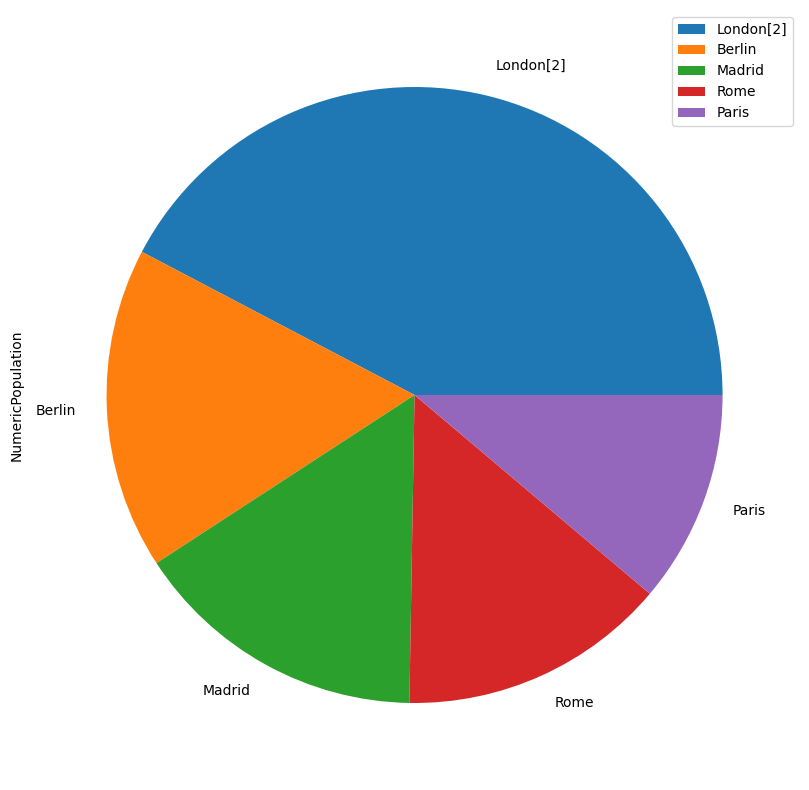

In [43]:
import pandas as pd

df_pop2 = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/european_cities4.csv")
df_pop2["NumericPopulation"] = df_pop2.Population.apply(lambda x: int(x.replace(",","")) )
df_pop2 = df_pop2.set_index("City")

df_pop2.head(5).plot.pie(y='NumericPopulation', figsize=(10,10))

#### Sort a dataframe based on the index

We can sort the index alphabetically using sort_index

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_index.html

In [ ]:
df_pop2 = df_pop2.sort_index()

In [ ]:
df_pop2.head(10)

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1-Oct-14,326676
Alicante,86,Spain,"334,678",1-Jan-12,334678
Amsterdam,23,Netherlands,"813,562",31-May-14,813562
Antwerp,59,Belgium,"510,610",1-Jan-14,510610
Athens,34,Greece,"664,046",24-May-11,664046
Barcelona,11,Spain,"1,602,386",1-Jan-14,1602386
Bari,95,Italy,"322,751",31-Dec-13,322751
Berlin,2,Germany,"3,437,916",31-May-14,3437916
Bielefeld,90,Germany,"328,314",31-Dec-12,328314


#### Multi-indexing - sort by multiple indeces

pandas allows you to define two columns as indeces and then sort

In [ ]:
df_pop3 = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/european_cities4.csv")
df_pop3["NumericPopulation"] = df_pop3.Population.apply(lambda x: int(x.replace(",","")) )
df_pop3 = df_pop3.set_index(["State","City"])
df_pop3.head(20)

,,Rank,Population,Date of census/estimate,NumericPopulation
State,City,,,,
United Kingdom,London[2],1,"8,615,246",1-Jun-14,8615246
Germany,Berlin,2,"3,437,916",31-May-14,3437916
Spain,Madrid,3,"3,165,235",1-Jan-14,3165235
Italy,Rome,4,"2,872,086",30-Sep-14,2872086
France,Paris,5,"2,273,305",1-Jan-13,2273305
Romania,Bucharest,6,"1,883,425",20-Oct-11,1883425
Austria,Vienna,7,"1,794,770",1-Jan-15,1794770
Germany,Hamburg[10],8,"1,746,342",30-Dec-13,1746342
Hungary,Budapest,9,"1,744,665",1-Jan-14,1744665


In [ ]:
# therefore we can sort by country and then within each country sort by city
df_pop3.sort_index()

Rank Population Date of census/estimate  \
State          City                                                    
Austria        Vienna           7  1,794,770                1-Jan-15   
Belgium        Antwerp         59    510,610                1-Jan-14   
               Brussels[17]    16  1,175,831                1-Jan-14   
Bulgaria       Plovdiv         84    341,041               31-Dec-13   
               Sofia           14  1,291,895               14-Dec-14   
...                           ...        ...                     ...   
United Kingdom Manchester      58    510,772               30-Jun-12   
               Nottingham     103    308,735               30-Jun-12   
               Sheffield       46    557,382               30-Jun-12   
               Wakefield       91    327,627               30-Jun-12   
               Wirral          97    320,229               30-Jun-12   

                             NumericPopulation  
State          City                             
Austria        Vienna                  1794770  
Belgium        Antwerp                  510610  
               Brussels[17]            1175831  
Bulgaria       Plovdiv                  341041  
               Sofia                   1291895  
...                                        ...  
United Kingdom Manchester               510772  
               Nottingham               308735  
               Sheffield                557382  
               Wakefield                327627  
               Wirral                   320229  

[105 rows x 4 columns]

In [ ]:
df_pop3.loc[("Sweden")]

,Rank,Population,Date of census/estimate,NumericPopulation
City,,,,
Stockholm,20,"909,976",31-Jan-14,909976
Gothenburg,53,"528,014",31-Mar-13,528014
Malmö,102,"309,105",31-Mar-13,309105


In [ ]:
df_pop3.loc[("Sweden","Stockholm")]

,Sweden
,Stockholm
Rank,20
Population,"909,976"
Date of census/estimate,31-Jan-14
NumericPopulation,909976


In [ ]:
df_pop3.loc[("Sweden","Stockholm")].Rank

np.int64(20)

##### **Exercise**

Make a bar chart containing the population of every city in the United Kingdom

<Axes: xlabel='City'>

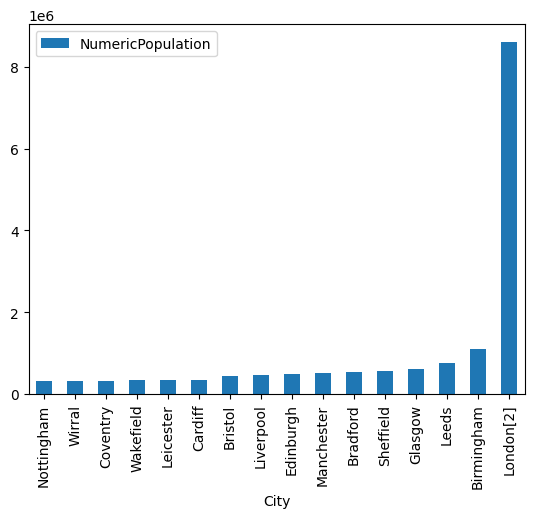

In [59]:
df_pop3 = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/european_cities4.csv")
df_pop3["NumericPopulation"] = df_pop3.Population.apply(lambda x: int(x.replace(",","")) )
df_pop3 = df_pop3.set_index(["State","City"])

data = df_pop3.sort_values(["State", "NumericPopulation"], ascending=[True,True])

data
data.loc["United Kingdom"].plot.bar(y='NumericPopulation')

#### Sort by column instead of by index

You can also sort by column instead of by index using sort_values (instead of sort_index)

In [ ]:
df_pop4 = df_pop2

In [ ]:
df_pop4.head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1-Oct-14,326676
Alicante,86,Spain,"334,678",1-Jan-12,334678
Amsterdam,23,Netherlands,"813,562",31-May-14,813562
Antwerp,59,Belgium,"510,610",1-Jan-14,510610
Athens,34,Greece,"664,046",24-May-11,664046


In [ ]:
df_pop4.sort_values(["State"]).head(12)

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Vienna,7,Austria,"1,794,770",1-Jan-15,1794770
Antwerp,59,Belgium,"510,610",1-Jan-14,510610
Brussels[17],16,Belgium,"1,175,831",1-Jan-14,1175831
Varna,85,Bulgaria,"335,819",31-Dec-13,335819
Sofia,14,Bulgaria,"1,291,895",14-Dec-14,1291895
Plovdiv,84,Bulgaria,"341,041",31-Dec-13,341041
Zagreb,24,Croatia,"790,017",31-Mar-11,790017
Prague,15,Czech Republic,"1,246,780",1-Jan-13,1246780
Brno,76,Czech Republic,"378,327",1-Jan-13,378327


In [ ]:
# Sort by state, then within each state sort buy rank
df_pop4.sort_values(["State","Rank"],ascending=[True,True]).head(30)

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Vienna,7,Austria,"1,794,770",1-Jan-15,1794770
Brussels[17],16,Belgium,"1,175,831",1-Jan-14,1175831
Antwerp,59,Belgium,"510,610",1-Jan-14,510610
Sofia,14,Bulgaria,"1,291,895",14-Dec-14,1291895
Plovdiv,84,Bulgaria,"341,041",31-Dec-13,341041
Varna,85,Bulgaria,"335,819",31-Dec-13,335819
Zagreb,24,Croatia,"790,017",31-Mar-11,790017
Prague,15,Czech Republic,"1,246,780",1-Jan-13,1246780
Brno,76,Czech Republic,"378,327",1-Jan-13,378327


In [ ]:
# Sort reverse alphebatically by state, then with each state sort by rank
df_pop4.sort_values(["State","Rank"],ascending=[False,True]).head(50)

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
London[2],1,United Kingdom,"8,615,246",1-Jun-14,8615246
Birmingham,17,United Kingdom,"1,092,330",30-Jun-13,1092330
Leeds,27,United Kingdom,"757,655",30-Jun-12,757655
Glasgow,40,United Kingdom,"596,550",31-Dec-13,596550
Sheffield,46,United Kingdom,"557,382",30-Jun-12,557382
Bradford,55,United Kingdom,"524,619",30-Jun-12,524619
Manchester,58,United Kingdom,"510,772",30-Jun-12,510772
Edinburgh,60,United Kingdom,"495,360",30-Jun-11,495360
Liverpool,64,United Kingdom,"469,690",30-Jun-12,469690


#### Counting how many times a given value occurs

use pandas.Series.value_counts to count number of occurances

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html

In [ ]:
city_counts = df_pop4.State.value_counts()
city_counts.name = "Number of cities per country"

In [ ]:
print(type(city_counts))

<class 'pandas.core.series.Series'>


In [ ]:
city_counts.head(20)

,Number of cities per country
State,
Germany,19
United Kingdom,16
Spain,13
Italy,10
Poland,10
France,5
Netherlands,4
Sweden,3
Bulgaria,3


In [ ]:
rank_counts = df_pop4.Rank.value_counts()
rank_counts.head(20)

,count
Rank,
42,2
92,1
23,1
86,1
34,1
11,1
95,1
59,1
2,1


##### **Exercise**


Make a horizontal bar chart ("barh") containing the number of cities in the 10 countries withe the most cities (hint: you can use slicing on the series we created with value_counts() )

#### Using pandas sum() to add data from multiple rows or columns

Goal: Find the population per country instead of by city

In [ ]:
# Some notes on read_csv options
#   delimiter=","  ( note: Default delimter is "," )
#   header=0  ( find column titles on row 0)
#   skiprows (number of rows to skip before reading in column data)
#   encoding (character type)
#   error_bad_lines=False  (skip lines that are causing errors)
#   only the file name is mandatory
df_pop5 = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/european_cities4.csv")
df_pop5["NumericPopulation"] = df_pop5.Population.apply(lambda x: int(x.replace(",","")) )
df_pop5 = df_pop5[["State", "City", "NumericPopulation"]].set_index(["State", "City"])
df_pop5.sort_index().head(50)

NumericPopulation
State          City                           
Austria        Vienna                  1794770
Belgium        Antwerp                  510610
               Brussels[17]            1175831
Bulgaria       Plovdiv                  341041
               Sofia                   1291895
               Varna                    335819
Croatia        Zagreb                   790017
Czech Republic Brno                     378327
               Prague                  1246780
Denmark        Aarhus                   326676
               Copenhagen               559440
Estonia        Tallinn                  434810
Finland        Helsinki                 605523
France         Lyon                     484344
               Marseille                852516
               Nice                     343304
               Paris                   2273305
               Toulouse                 441802
Germany        Berlin                  3437916
               Bielefeld                328314
               Bochum                   362213
               Bonn                     309869
               Bremen                   546451
               Cologne                 1034175
               Dortmund                 575944
               Dresden                  530754
               Duisburg                 486816
               Düsseldorf               593682
               Essen                    569884
               Frankfurt                701350
               Hamburg[10]             1746342
               Hanover                  514137
               Leipzig                  531562
               Munich                  1407836
               Nuremberg                495121
               Stuttgart                604297
               Wuppertal                342885
Greece         Athens                   664046
               Thessaloniki             322240
Hungary        Budapest                1744665
Ireland        Dublin                   527612
Italy          Bari                     322751
               Bologna                  384202
               Catania                  315576
               Florence                 377207
               Genoa                    594774
               Milan                   1332516
               Naples                   989845
               Palermo                  677015
               Rome                    2872086

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html

 DataFrame.sum(self, axis=None, skipna=None, level=None, numeric_only=None, min_count=0, **kwargs)[source]

    Return the sum of the values for the requested axis.

        This is equivalent to the method numpy.sum.

    Parameters:

    axis : {index (0), columns (1)}

        Axis for the function to be applied on.
    skipna : bool, default True

        Exclude NA/null values when computing the result.
    level : int or level name, default None

        If the axis is a MultiIndex (hierarchical), count along a particular level, collapsing into a Series.


In [ ]:
# create a new dataframe containing sums

df_totalpop = df_pop5.groupby("State").sum().sort_values("NumericPopulation", ascending=False)
df_totalpop.head(500)

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409
France,4395271
Romania,2527280
Netherlands,2271771
Bulgaria,1968755


_<font color=magenta>----Begin Exercise----</font> _

Make a horizontal bar chart of the total population of the 10 least populous countries

_<font color=magenta>----End Exercise----</font> _


## Timeseries with pandas

International standard time notation: https://www.cl.cam.ac.uk/~mgk25/iso-time.html

ISO 8601 https://en.wikipedia.org/wiki/ISO_8601

UTC (Coordinated Universal Time)

year-month-day

24 hour clock

hour:minute:second.fraction

pandas timeseries

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

numpy.datetime64

https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.datetime.html

In [ ]:
import pandas as pd

# Raw data dictionary
data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994',
                 '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071',
                 '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592',
                 '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109',
                 '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877',
                 '2015-01-02 18:47:05.230071', '2015-01-02 18:47:05.280592',
                 '2015-01-03 18:47:05.332662', '2015-01-03 18:47:05.385109',
                 '2016-03-04 18:47:05.436523', '2016-03-04 18:47:05.486877',
                ],
        'count': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41,42,21,52,14,15,26]}

# Turn the dictionary into a dataframe
df = pd.DataFrame(data, columns = ['date', 'count'])

# Convert the string date to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Set the index to be the datetime object and reassign the dataframe to equal a new dataframe with the same name
df = df.set_index('date')

print(df_datetime.index)


DatetimeIndex(['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994',
               '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071',
               '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592',
               '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109',
               '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877',
               '2015-01-02 18:47:05.230071', '2015-01-02 18:47:05.280592',
               '2015-01-03 18:47:05.332662', '2015-01-03 18:47:05.385109',
               '2016-03-04 18:47:05.436523', '2016-03-04 18:47:05.486877'],
              dtype='datetime64[ns]', name='date', freq=None)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2014-05-01 18:47:05.069722 to 2016-03-04 18:47:05.486877
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   16 non-null     int64
dtypes: int64(1)
memory usage: 256.0 bytes


In [ ]:
df

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [ ]:
# all observations that occured in 2015
# df['2015']
# Workaround:
df[df.index.year == 2015]

,count
date,
2015-01-02 18:47:05.230071,42
2015-01-02 18:47:05.280592,21
2015-01-03 18:47:05.332662,52
2015-01-03 18:47:05.385109,14


In [ ]:
# Alternate
df.loc[df.index.year == 2015]

,count
date,
2015-01-02 18:47:05.230071,42
2015-01-02 18:47:05.280592,21
2015-01-03 18:47:05.332662,52
2015-01-03 18:47:05.385109,14


In [ ]:
# Alternate
df.loc[(df.index >= '2015-01-01') & (df.index < '2016-01-01')]

,count
date,
2015-01-02 18:47:05.230071,42
2015-01-02 18:47:05.280592,21
2015-01-03 18:47:05.332662,52
2015-01-03 18:47:05.385109,14


In [ ]:
# All observations on a specific day
#df['2014-05-01']
# Alternate
df.loc['2014-05-01']


,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25


In [ ]:
# Alternate
df[(df.index >= '2014-05-01') & (df.index < '2014-05-02')]


,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25


In [ ]:
# all dates after 2015-01-01
#df["2015/1/1":]
df[df.index >= "2015-01-01"]
# This also works df.loc[df.index >= "2015-01-01"]


,count
date,
2015-01-02 18:47:05.230071,42
2015-01-02 18:47:05.280592,21
2015-01-03 18:47:05.332662,52
2015-01-03 18:47:05.385109,14
2016-03-04 18:47:05.436523,15
2016-03-04 18:47:05.486877,26


In [ ]:
# all dates before 2015-01-01
#df[:"2015/1/1"]
df[df.index < "2015-01-02"]
# This also works df.loc[df.index < "2015-01-02"]



,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [ ]:
# observations between two dates
#df['5/3/2014':'5/4/2014']
df[(df.index >= '2014-05-03') & (df.index < '2014-05-05')]
# This also works df.loc[(df.index >= '2014-05-03') & (df.index < '2014-05-05')]



,count
date,
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62
2014-05-04 18:47:05.486877,41


In [ ]:
df

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [ ]:
# remove all observations made on some date and all following
df.truncate(after='5/3/2014')
# This also works (keeps all of May 3rd and before):
# df.loc[df.index < '2014-05-04']

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14


In [ ]:
# observations on a certain date
df.loc['2014-05-01']

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25


In [ ]:
df.loc['05/01/2014']

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25


In [ ]:
# group by date
df.groupby(level=0).count()

,count
date,
2014-05-01 18:47:05.069722,1
2014-05-01 18:47:05.119994,1
2014-05-02 18:47:05.178768,1
2014-05-02 18:47:05.230071,2
2014-05-02 18:47:05.280592,1
2014-05-03 18:47:05.332662,1
2014-05-03 18:47:05.385109,1
2014-05-04 18:47:05.436523,1
2014-05-04 18:47:05.486877,1


In [ ]:
df.head(20)

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

# Resample time series data by day

df.resample('D')

In [ ]:
df.resample('D').sum()

,count
date,
2014-05-01,59
2014-05-02,70
2014-05-03,51
2014-05-04,103
2014-05-05,0
...,...
2016-02-29,0
2016-03-01,0
2016-03-02,0


In [ ]:
df2 = df.resample('D').sum()

In [ ]:
df2[pd.notnull(df2['count'])]

,count
date,
2014-05-01,59
2014-05-02,70
2014-05-03,51
2014-05-04,103
2014-05-05,0
...,...
2016-02-29,0
2016-03-01,0
2016-03-02,0


In [ ]:
df3 = df.resample('ME').sum()

,count
date,
2014-05-31,283
2014-06-30,0
2014-07-31,0
2014-08-31,0
2014-09-30,0
2014-10-31,0
2014-11-30,0
2014-12-31,0
2015-01-31,129


### Time series data with a moderately large dataset (~50000 rows)

New lets look at two input files, each containing two columns: unicode time (time stince 1/1/1970) and the measured temperature (C)


these are tab separated lists, so we will need to set the delimeter  in read_csv with "\t":

In [ ]:
!head -n 25 temperature_outdoor_2014.tsv

In [ ]:
!head -n 25 temperature_indoor_2014.tsv

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])

In [ ]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [ ]:
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     49548 non-null  int64  
 1   outdoor  49548 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 774.3 KB


In [ ]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype                           
---  ------   --------------  -----                           
 0   time     49548 non-null  datetime64[ns, Europe/Stockholm]
 1   outdoor  49548 non-null  float64                         
dtypes: datetime64[ns, Europe/Stockholm](1), float64(1)
memory usage: 774.3 KB


In [ ]:
df1 = df1.set_index("time")

In [ ]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [ ]:
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [ ]:
df2 = df2.set_index("time")

In [ ]:
df2.head()

,indoor
time,
2014-01-01 00:03:06+01:00,21.94
2014-01-01 00:13:06+01:00,22.00
2014-01-01 00:23:07+01:00,22.00
2014-01-01 00:33:07+01:00,22.00
2014-01-01 00:43:08+01:00,22.00


In [ ]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

In [ ]:
df1.index[0:4]

DatetimeIndex(['2014-01-01 00:03:06+01:00', '2014-01-01 00:13:06+01:00',
               '2014-01-01 00:23:07+01:00', '2014-01-01 00:33:07+01:00'],
              dtype='datetime64[ns, Europe/Stockholm]', name='time', freq=None)

<Axes: xlabel='time'>

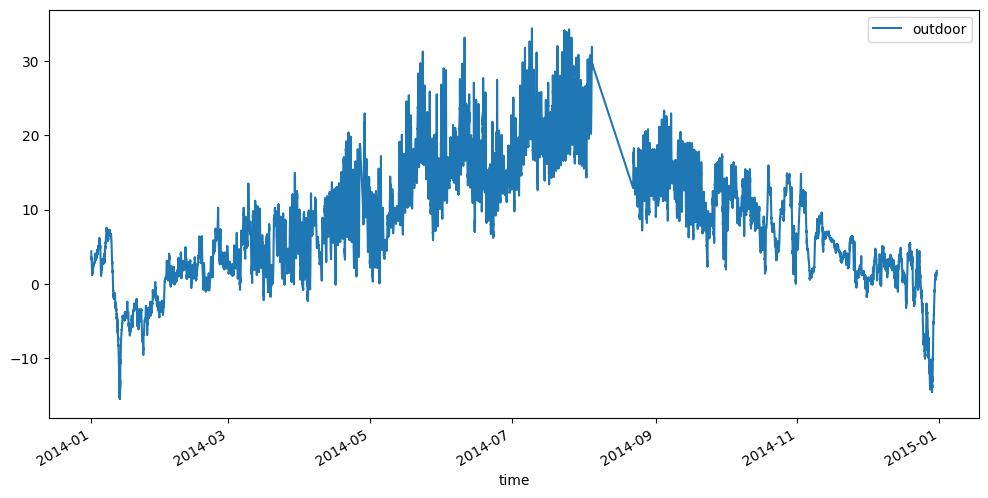

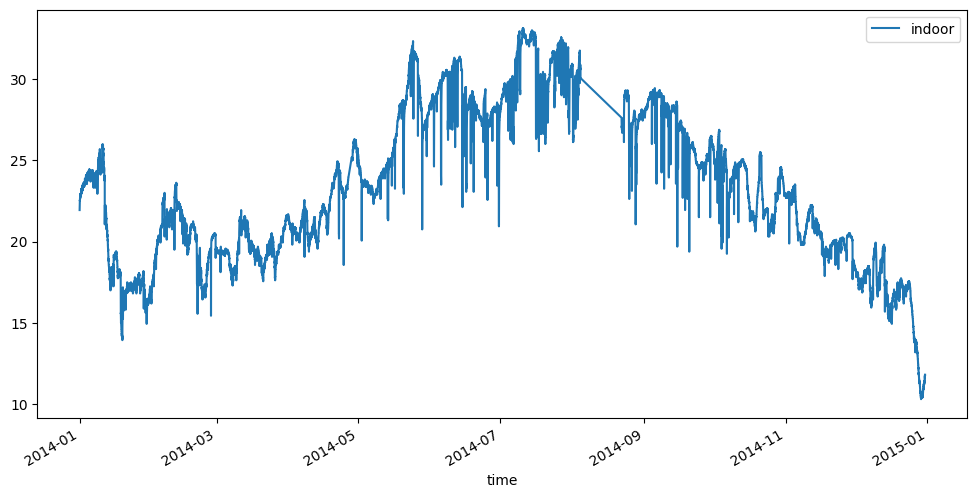

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
df1.plot()
df2.plot()

<Axes: xlabel='time'>

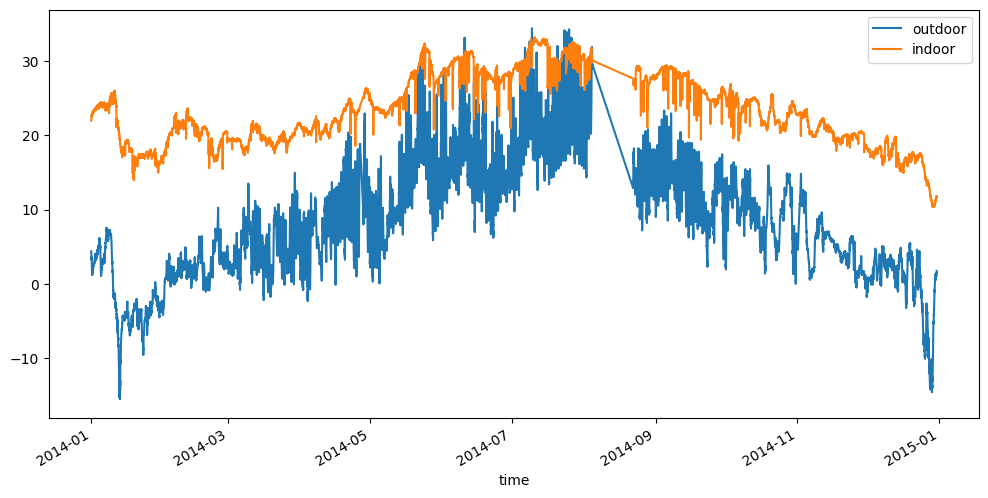

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df1.plot()
df2.plot(ax=ax)

In [ ]:
# Since we have a time series index we can select subsets of the data (returns a boolean array)
df1.index < "2014-2-1"

array([ True,  True,  True, ..., False, False, False])

In [ ]:
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [ ]:
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  4452 non-null   float64
dtypes: float64(1)
memory usage: 69.6 KB


In [ ]:
# we couild instead selecdt a subset of the data with slicing syntax
df2_jan = df2["2014-1-1":"2014-1-31"]

<Axes: xlabel='time'>

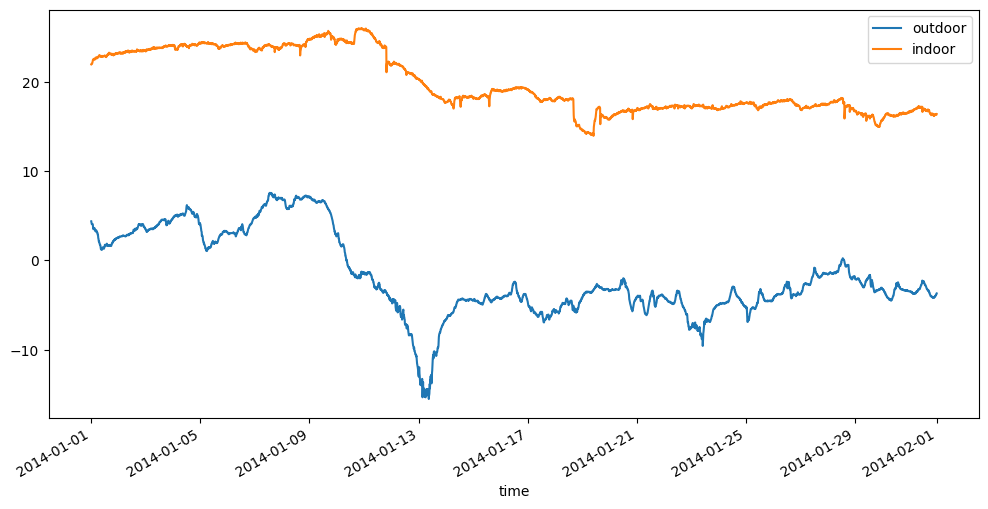

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df1_jan.plot()
df2_jan.plot(ax=ax)

In [ ]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [ ]:
# convert an index back into a column so that we can use the apply function on the column
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
df1_month = df1.reset_index()

In [ ]:
df1_month.head()

,time,outdoor
0,2014-01-01 00:03:06+01:00,4.38
1,2014-01-01 00:13:06+01:00,4.25
2,2014-01-01 00:23:07+01:00,4.19
3,2014-01-01 00:33:07+01:00,4.06
4,2014-01-01 00:43:08+01:00,4.06


In [ ]:
df1_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype                           
---  ------   --------------  -----                           
 0   time     49548 non-null  datetime64[ns, Europe/Stockholm]
 1   outdoor  49548 non-null  float64                         
dtypes: datetime64[ns, Europe/Stockholm](1), float64(1)
memory usage: 774.3 KB


In [ ]:
df1_month.loc[0,"time"]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

In [ ]:
# use the datetime64 attribute month
df1_month.loc[0,"time"].month

1

In [ ]:
df1_month.loc[0,"time"].minute

3

In [ ]:
df1_month.loc[0,"time"].second

6

In [ ]:
# add a new column containting the month for each row
df1_month["month"] = df1_month.time.apply(lambda x: x.month)

In [ ]:
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [ ]:
df1_month.tail()

,time,outdoor,month
49543,2014-12-30 23:16:33+01:00,1.56,12
49544,2014-12-30 23:26:33+01:00,1.62,12
49545,2014-12-30 23:36:34+01:00,1.62,12
49546,2014-12-30 23:46:35+01:00,1.62,12
49547,2014-12-30 23:56:35+01:00,1.75,12


Group rows based on the column "month" and calculate a function on each group

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html

In [ ]:
df1_month.groupby("month").mean().head(12)

,time,outdoor
month,,
1,2014-01-16 12:03:12.925202176+01:00,-1.776646
2,2014-02-14 23:35:16.712750080+01:00,2.231613
3,2014-03-16 11:31:11.396493568+01:00,4.615437
4,2014-04-15 10:58:42.324409856+02:00,8.105193
5,2014-05-16 12:03:38.975752192+02:00,12.261396
6,2014-06-15 23:58:27.694341376+02:00,15.586955
7,2014-07-16 11:58:41.685662976+02:00,20.780314
8,2014-08-20 10:27:16.163021056+02:00,16.494823
9,2014-09-16 00:00:56.792903680+02:00,12.823905


In [ ]:
df1_month_group_agg = df1_month.groupby("month").aggregate(np.mean)

/tmp/ipython-input-2152412996.py:1: FutureWarning: The provided callable <function mean at 0x7cde9bb70900> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1_month_group_agg = df1_month.groupby("month").aggregate(np.mean)


In [ ]:
df1_month_group_agg.head(12)

,time,outdoor
month,,
1,2014-01-16 12:03:12.925202176+01:00,-1.776646
2,2014-02-14 23:35:16.712750080+01:00,2.231613
3,2014-03-16 11:31:11.396493568+01:00,4.615437
4,2014-04-15 10:58:42.324409856+02:00,8.105193
5,2014-05-16 12:03:38.975752192+02:00,12.261396
6,2014-06-15 23:58:27.694341376+02:00,15.586955
7,2014-07-16 11:58:41.685662976+02:00,20.780314
8,2014-08-20 10:27:16.163021056+02:00,16.494823
9,2014-09-16 00:00:56.792903680+02:00,12.823905


In [ ]:
# Repeat this for the indoor dataset
df2_month = df2.reset_index()
df2_month["month"] = df2_month.time.apply(lambda x: x.month)
df2_month_group_agg = df2_month.groupby("month").aggregate(np.mean)

/tmp/ipython-input-891025025.py:4: FutureWarning: The provided callable <function mean at 0x7cde9bb70900> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df2_month_group_agg = df2_month.groupby("month").aggregate(np.mean)


In [ ]:
df2_month_group_agg.head(12)

,time,indoor
month,,
1,2014-01-16 12:03:13.027178752+01:00,19.862590
2,2014-02-14 23:34:06.455886080+01:00,20.231507
3,2014-03-16 11:31:08.956169728+01:00,19.597748
4,2014-04-15 11:07:52.982951680+02:00,22.149754
5,2014-05-16 12:07:11.741746944+02:00,26.332160
6,2014-06-15 23:58:28.564471296+02:00,28.687491
7,2014-07-16 11:58:42.548575232+02:00,30.605333
8,2014-08-20 10:28:45.424778752+02:00,28.099068
9,2014-09-16 00:00:58.557282048+02:00,26.950366


In [ ]:
# Join two data frames (create one dataframe with columns from both df1 and df2)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html
#df_month = df1_month_group_agg.join(df2_month_group_agg)
df_month = df1_month_group_agg.join(df2_month_group_agg, lsuffix='_df1', rsuffix='_df2')


In [ ]:
df_month.head(10)

,time_df1,outdoor,time_df2,indoor
month,,,,
1,2014-01-16 12:03:12.925202176+01:00,-1.776646,2014-01-16 12:03:13.027178752+01:00,19.862590
2,2014-02-14 23:35:16.712750080+01:00,2.231613,2014-02-14 23:34:06.455886080+01:00,20.231507
3,2014-03-16 11:31:11.396493568+01:00,4.615437,2014-03-16 11:31:08.956169728+01:00,19.597748
4,2014-04-15 10:58:42.324409856+02:00,8.105193,2014-04-15 11:07:52.982951680+02:00,22.149754
5,2014-05-16 12:03:38.975752192+02:00,12.261396,2014-05-16 12:07:11.741746944+02:00,26.332160
6,2014-06-15 23:58:27.694341376+02:00,15.586955,2014-06-15 23:58:28.564471296+02:00,28.687491
7,2014-07-16 11:58:41.685662976+02:00,20.780314,2014-07-16 11:58:42.548575232+02:00,30.605333
8,2014-08-20 10:27:16.163021056+02:00,16.494823,2014-08-20 10:28:45.424778752+02:00,28.099068
9,2014-09-16 00:00:56.792903680+02:00,12.823905,2014-09-16 00:00:58.557282048+02:00,26.950366


##### **Exercise**

Make a bar chart containing both the indoor and outdoor temperature

(Hint: you can simply plot our combined month dataframe df_month)

You may want to use grid='true' to make the plot more readable

Make a box plot summarizing the indoor and outside temperature

In [ ]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


#### Resampling a timeseries

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html



In [ ]:
df1_hour = df1.resample("H").mean()

/tmp/ipython-input-105550632.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df1_hour = df1.resample("H").mean()


In [ ]:
df1_day = df1.resample("D").mean()

In [ ]:
df1_week = df1.resample("7D").mean()

In [ ]:
df1_month = df1.resample("ME").mean() #ME = Month End

In [ ]:
df1_week.head(20)

,outdoor
time,
2014-01-01 00:00:00+01:00,3.843320
2014-01-08 00:00:00+01:00,-2.006038
2014-01-15 00:00:00+01:00,-4.358897
2014-01-22 00:00:00+01:00,-3.976842
2014-01-29 00:00:00+01:00,-0.904056
2014-02-05 00:00:00+01:00,1.815616
2014-02-12 00:00:00+01:00,2.195382
2014-02-19 00:00:00+01:00,3.199446
2014-02-26 00:00:00+01:00,2.668042


In [ ]:
df1_week=df1_week.rename(columns={"outdoor": "Average weekly outdoor temperature"})

In [ ]:
df1_week

,Average weekly outdoor temperature
time,
2014-01-01 00:00:00+01:00,3.843320
2014-01-08 00:00:00+01:00,-2.006038
2014-01-15 00:00:00+01:00,-4.358897
2014-01-22 00:00:00+01:00,-3.976842
2014-01-29 00:00:00+01:00,-0.904056
2014-02-05 00:00:00+01:00,1.815616
2014-02-12 00:00:00+01:00,2.195382
2014-02-19 00:00:00+01:00,3.199446
2014-02-26 00:00:00+01:00,2.668042


In [ ]:
df1_hour  = df1_hour.rename(columns={"outdoor": "Average hourly outdoor temperature"})
df1_day   = df1_day.rename(columns={"outdoor": "Average daily outdoor temperature"})
df1_month = df1_month.rename(columns={"outdoor": "Average monthly outdoor temperature"})

In [ ]:
df_diff_week = (df1.resample("W").outdoor.mean() - df2.resample("W").indoor.mean())
df_diff_day  = (df1.resample("D").outdoor.mean() - df2.resample("D").indoor.mean())

<Axes: xlabel='time'>

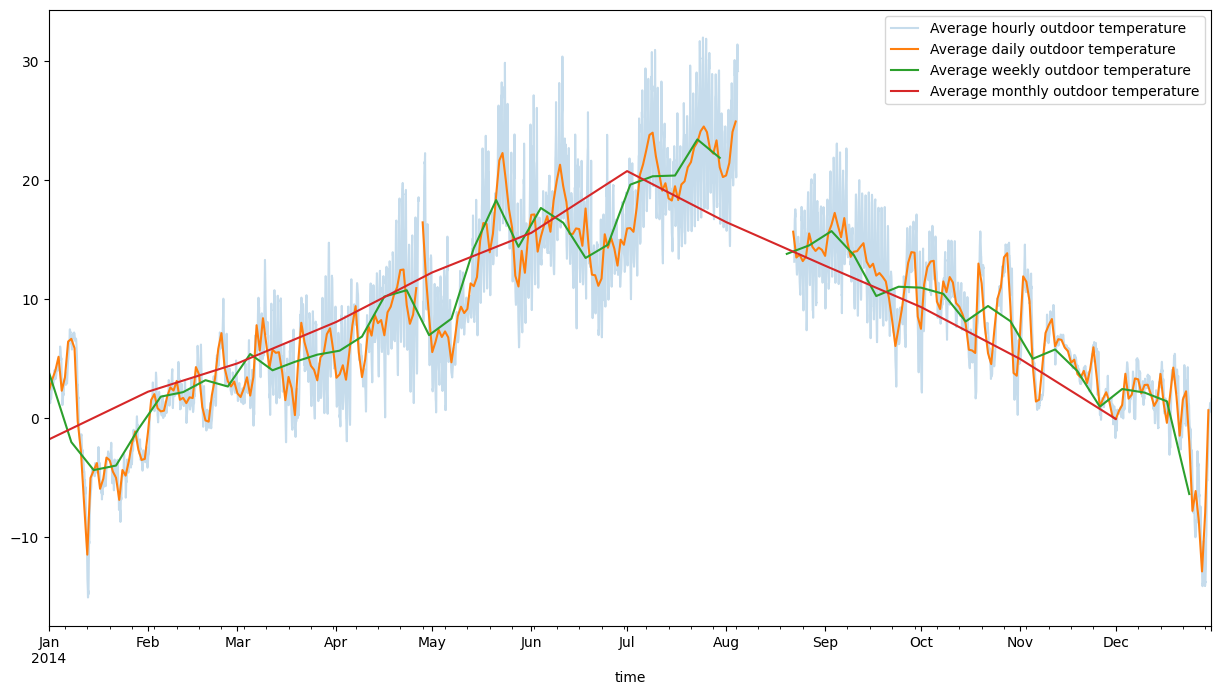

In [ ]:
plt.rcParams['figure.figsize'] = 15, 8
ax = df1_hour.plot(alpha=0.25)
df1_day.plot(ax=ax)
df1_week.plot(ax=ax)
df1_month.plot(ax=ax)


<Axes: xlabel='time'>

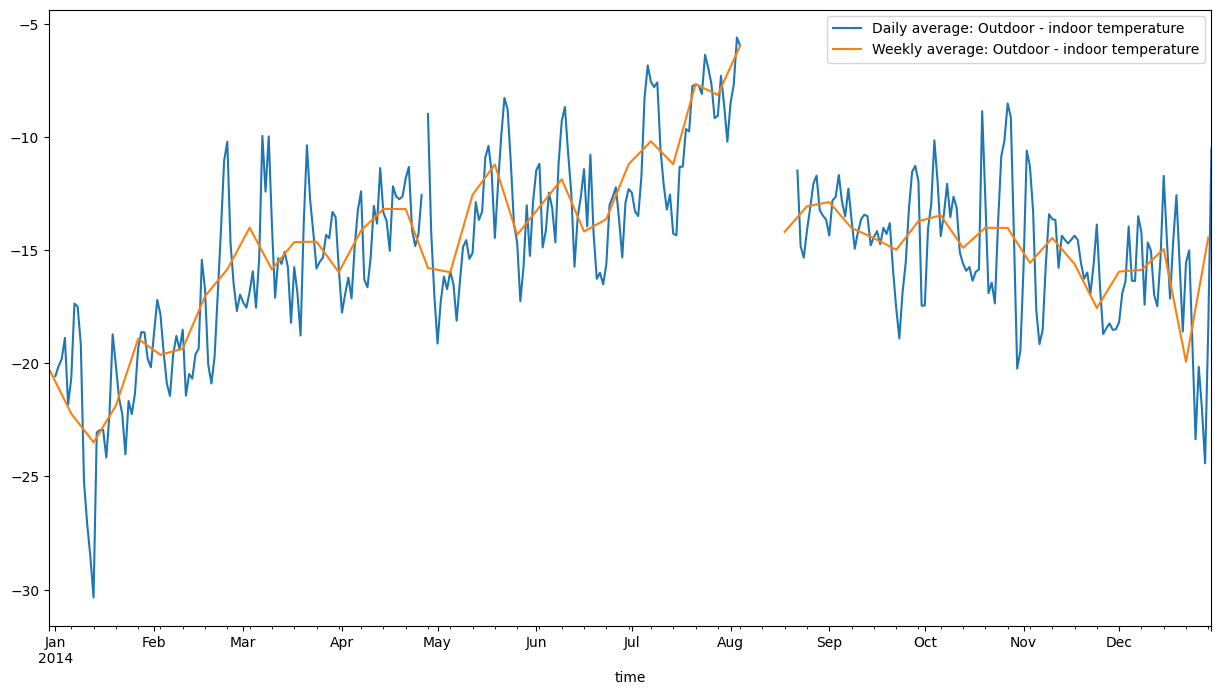

In [ ]:
ax2 = df_diff_day.plot(label="Daily average: Outdoor - indoor temperature",legend=True)
df_diff_week.plot(ax=ax2,label="Weekly average: Outdoor - indoor temperature",legend=True)

<Axes: ylabel='Frequency'>

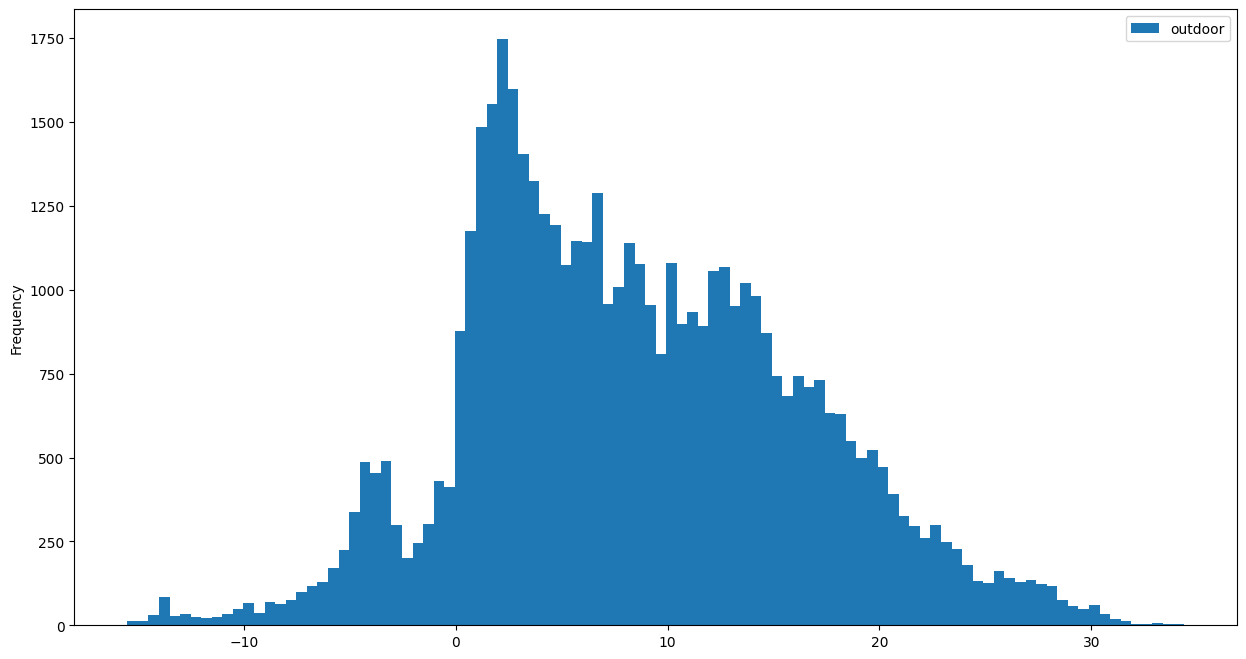

In [ ]:
df1.plot.hist(bins=100)

<Axes: ylabel='Frequency'>

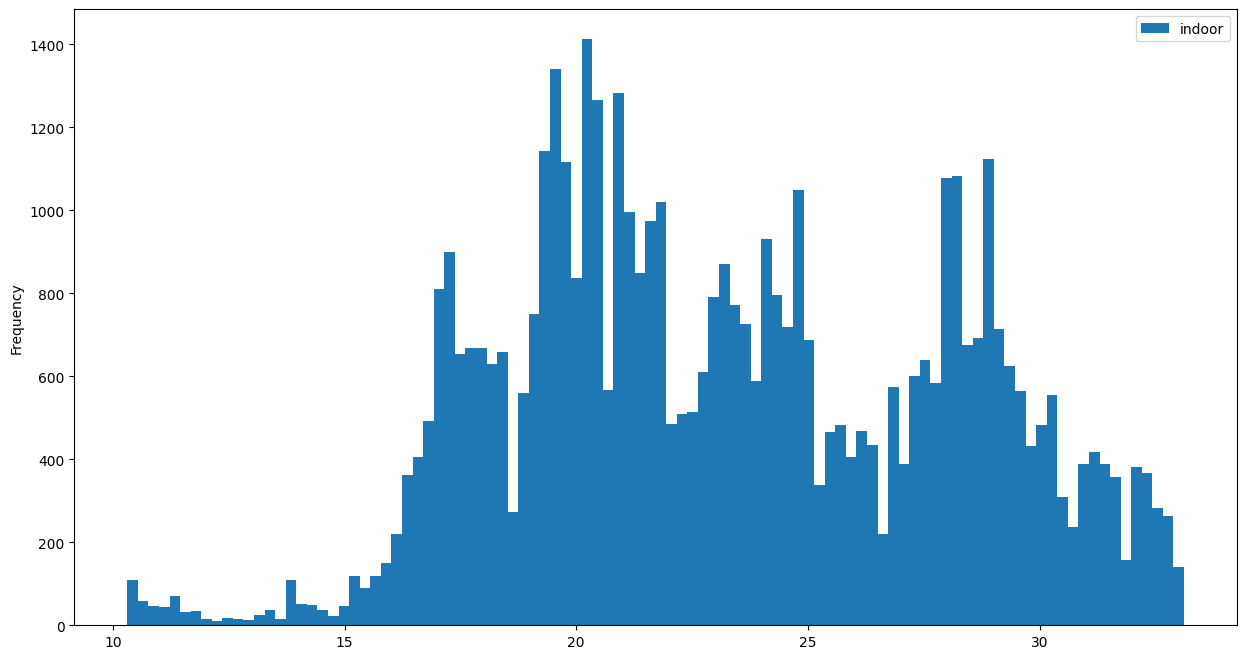

In [ ]:
df2.plot.hist(bins=100)

<Axes: ylabel='Frequency'>

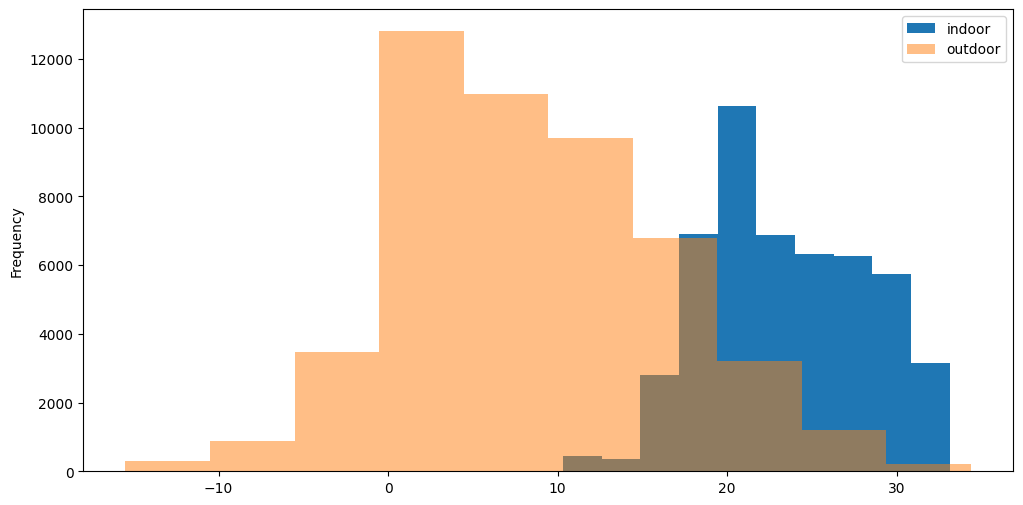

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df2.plot.hist()
df1.plot.hist(ax=ax,alpha=0.5)